# ETAPA 3: Análise das Variáveis Categóricas Fechadas

## Consulta à Comunidade UFPE sobre o Uso de Inteligência Artificial

---

**Objetivo:** Mapear padrões de uso e comportamento em relação à IA.

**Variáveis analisadas:**
- Frequência de uso de IA (frequentemente, ocasionalmente, uma vez, nunca)
- Tipo de uso predominante (pago, gratuito, ambos, não se aplica)
- Sentimento de preparação para uso ético (sim, parcialmente, não)

**Procedimentos:**
1. Calcular frequências absolutas e percentuais para cada variável
2. Estratificar resultados por vínculo institucional
3. Aplicar teste qui-quadrado para verificar associações significativas entre variáveis
4. Gerar gráficos de barras comparativos

**Produto:** Tabelas de frequência estratificadas; testes de associação; visualizações gráficas.

**Critério de Validação:** Significância estatística (p < 0,05) para associações reportadas.

---

## Requisitos Técnicos

### Kernel Python
- **Python:** 3.9 ou superior
- **Kernel recomendado:** `python3` ou ambiente virtual com as dependências instaladas

### Dados de Entrada

| Arquivo | Descrição | Origem |
|---------|-----------|--------|
| `dados_limpos_etapa1.xlsx` | Base de dados limpa com 2.164 registros | Etapa 1 |

### Dados de Saída

| Arquivo | Descrição |
|---------|----------|
| `categoricas_fechadas_etapa3.xlsx` | Tabelas de frequência e testes estatísticos |
| `grafico_frequencia_uso_etapa3.png` | Distribuição da frequência de uso de IA |
| `grafico_tipo_uso_etapa3.png` | Distribuição do tipo de uso (pago/gratuito) |
| `grafico_preparacao_etapa3.png` | Distribuição do sentimento de preparação |
| `grafico_estratificado_etapa3.png` | Análises estratificadas por vínculo |
| `relatorio_categoricas_etapa3.md` | Relatório com resultados e testes estatísticos |

---

## 1. Instalação de Dependências

In [1]:
# ============================================================================
# INSTALAÇÃO DE DEPENDÊNCIAS
# Execute esta célula apenas uma vez para instalar os pacotes necessários
# ============================================================================

!pip install pandas openpyxl matplotlib seaborn numpy scipy --quiet

print("✅ Dependências instaladas com sucesso!")

✅ Dependências instaladas com sucesso!


## 2. Configuração Inicial

In [2]:
# ============================================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Configurações de visualização
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Verificar versões
print("Bibliotecas carregadas com sucesso!")
print(f"  • Pandas: {pd.__version__}")
print(f"  • Scipy: {stats.__name__} (para testes estatísticos)")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • Seaborn: {sns.__version__}")

Bibliotecas carregadas com sucesso!
  • Pandas: 2.3.3
  • Scipy: scipy.stats (para testes estatísticos)
  • Matplotlib: 3.10.7
  • Seaborn: 0.13.2


In [4]:
# ============================================================================
# CONFIGURAÇÃO DE ARQUIVOS DE ENTRADA E SAÍDA
# ============================================================================

# Arquivo de entrada (gerado na Etapa 1)
ARQUIVO_ENTRADA = "data/dados_limpos_etapa1.xlsx"

# Arquivos de saída
ARQUIVO_SAIDA_EXCEL = "data/categoricas_fechadas_etapa3.xlsx"
ARQUIVO_SAIDA_RELATORIO = "data/relatorio_categoricas_etapa3.md"

# Nível de significância para testes estatísticos
ALPHA = 0.05

print("Configuração de arquivos:")
print(f"  📥 Entrada: {ARQUIVO_ENTRADA}")
print(f"  📤 Saídas:  {ARQUIVO_SAIDA_EXCEL}")
print(f"            {ARQUIVO_SAIDA_RELATORIO}")
print(f"  📊 Nível de significância (α): {ALPHA}")

Configuração de arquivos:
  📥 Entrada: data/dados_limpos_etapa1.xlsx
  📤 Saídas:  data/categoricas_fechadas_etapa3.xlsx
            data/relatorio_categoricas_etapa3.md
  📊 Nível de significância (α): 0.05


## 3. Carregamento dos Dados

In [5]:
# Carregar dados limpos da Etapa 1
try:
    df = pd.read_excel(ARQUIVO_ENTRADA)
    print(f"✅ Dados carregados com sucesso!")
    print(f"   Registros: {len(df)}")
    print(f"   Variáveis: {len(df.columns)}")
except FileNotFoundError:
    print(f"❌ ERRO: Arquivo '{ARQUIVO_ENTRADA}' não encontrado!")
    print(f"   Certifique-se de que a Etapa 1 foi executada e o arquivo está no diretório correto.")
    raise

✅ Dados carregados com sucesso!
   Registros: 2164
   Variáveis: 24


In [6]:
# Identificar as variáveis categóricas fechadas de interesse
print("=" * 70)
print("VARIÁVEIS CATEGÓRICAS FECHADAS PARA ANÁLISE")
print("=" * 70)

variaveis_categoricas = {
    'Frequencia_Uso_IA': 'Frequência de uso de ferramentas de IA',
    'Tipo_Uso': 'Tipo de uso predominante (pago/gratuito)',
    'Preparacao_Uso_Etico': 'Sentimento de preparação para uso ético'
}

for var, descricao in variaveis_categoricas.items():
    print(f"\n📌 {var}")
    print(f"   Descrição: {descricao}")
    print(f"   Valores únicos: {df[var].nunique()}")
    print(f"   Valores: {df[var].unique().tolist()}")

VARIÁVEIS CATEGÓRICAS FECHADAS PARA ANÁLISE

📌 Frequencia_Uso_IA
   Descrição: Frequência de uso de ferramentas de IA
   Valores únicos: 4
   Valores: ['Sim, frequentemente', 'Sim, ocasionalmente', 'Nunca usei', 'Já testei uma vez']

📌 Tipo_Uso
   Descrição: Tipo de uso predominante (pago/gratuito)
   Valores únicos: 5
   Valores: ['Pago (assinaturas ou créditos)', 'Gratuito (versões abertas) por exemplo versões free', 'Ambos', 'Gratuito (versões abertas)', 'Não se aplica']

📌 Preparacao_Uso_Etico
   Descrição: Sentimento de preparação para uso ético
   Valores únicos: 3
   Valores: ['Sim', 'Parcialmente', 'Não']


---

## 4. Funções Auxiliares

In [7]:
def calcular_frequencias(df, variavel, nome_variavel=None):
    """
    Calcula frequências absolutas e relativas para uma variável categórica.
    """
    freq = df[variavel].value_counts().reset_index()
    freq.columns = [nome_variavel or variavel, 'Frequência']
    freq['Percentual'] = (freq['Frequência'] / freq['Frequência'].sum() * 100).round(1)
    freq['Percentual_Acum'] = freq['Percentual'].cumsum().round(1)
    return freq


def calcular_frequencias_estratificadas(df, variavel, estratificador='Vinculo_Padronizado'):
    """
    Calcula frequências estratificadas por uma variável de agrupamento.
    Retorna tabela cruzada absoluta e percentual.
    """
    # Tabela cruzada absoluta
    tab_abs = pd.crosstab(df[estratificador], df[variavel], margins=True, margins_name='Total')
    
    # Tabela cruzada percentual (por linha)
    tab_pct = pd.crosstab(df[estratificador], df[variavel], normalize='index') * 100
    tab_pct = tab_pct.round(1)
    
    return tab_abs, tab_pct


def teste_qui_quadrado(df, var1, var2):
    """
    Realiza teste qui-quadrado de independência entre duas variáveis categóricas.
    Retorna estatística, p-valor, graus de liberdade e interpretação.
    """
    # Criar tabela de contingência
    tabela = pd.crosstab(df[var1], df[var2])
    
    # Realizar teste qui-quadrado
    chi2, p_valor, gl, freq_esperadas = chi2_contingency(tabela)
    
    # Calcular V de Cramér (tamanho do efeito)
    n = tabela.sum().sum()
    min_dim = min(tabela.shape[0] - 1, tabela.shape[1] - 1)
    v_cramer = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    
    # Interpretação do V de Cramér
    if v_cramer < 0.1:
        efeito = "desprezível"
    elif v_cramer < 0.3:
        efeito = "fraco"
    elif v_cramer < 0.5:
        efeito = "moderado"
    else:
        efeito = "forte"
    
    resultado = {
        'var1': var1,
        'var2': var2,
        'chi2': round(chi2, 3),
        'p_valor': p_valor,
        'gl': gl,
        'v_cramer': round(v_cramer, 3),
        'efeito': efeito,
        'significativo': p_valor < ALPHA
    }
    
    return resultado


def interpretar_resultado(resultado):
    """
    Gera interpretação textual do teste qui-quadrado.
    """
    if resultado['significativo']:
        texto = f"Há associação estatisticamente significativa (χ² = {resultado['chi2']}, p < 0,001)" if resultado['p_valor'] < 0.001 else f"Há associação estatisticamente significativa (χ² = {resultado['chi2']}, p = {resultado['p_valor']:.4f})"
        texto += f" com efeito {resultado['efeito']} (V de Cramér = {resultado['v_cramer']})."
    else:
        texto = f"Não há associação estatisticamente significativa (χ² = {resultado['chi2']}, p = {resultado['p_valor']:.4f})."
    return texto


print("✅ Funções auxiliares carregadas com sucesso!")

✅ Funções auxiliares carregadas com sucesso!


---

## 5. Análise da Frequência de Uso de IA

**Variável:** `Frequencia_Uso_IA`

**Categorias:** Sim, frequentemente | Sim, ocasionalmente | Já testei uma vez | Nunca usei

In [8]:
# Definir ordem das categorias
ordem_frequencia = ['Sim, frequentemente', 'Sim, ocasionalmente', 'Já testei uma vez', 'Nunca usei']

# Calcular frequências
freq_uso = calcular_frequencias(df, 'Frequencia_Uso_IA', 'Frequência de Uso')

# Reordenar conforme ordem lógica
freq_uso['ordem'] = freq_uso['Frequência de Uso'].apply(lambda x: ordem_frequencia.index(x) if x in ordem_frequencia else 99)
freq_uso = freq_uso.sort_values('ordem').drop('ordem', axis=1).reset_index(drop=True)

print("=" * 70)
print("FREQUÊNCIA DE USO DE FERRAMENTAS DE IA")
print("=" * 70)
print(freq_uso.to_string(index=False))

FREQUÊNCIA DE USO DE FERRAMENTAS DE IA
  Frequência de Uso  Frequência  Percentual  Percentual_Acum
Sim, frequentemente        1096        50.6             50.6
Sim, ocasionalmente         851        39.3             89.9
  Já testei uma vez         136         6.3             96.2
         Nunca usei          81         3.7             99.9


In [9]:
# Estratificar por vínculo
tab_uso_abs, tab_uso_pct = calcular_frequencias_estratificadas(df, 'Frequencia_Uso_IA')

# Reordenar colunas
colunas_ordenadas = [c for c in ordem_frequencia if c in tab_uso_abs.columns] + ['Total']
tab_uso_abs = tab_uso_abs[colunas_ordenadas]
tab_uso_pct = tab_uso_pct[[c for c in ordem_frequencia if c in tab_uso_pct.columns]]

print("\n" + "=" * 90)
print("FREQUÊNCIA DE USO POR VÍNCULO INSTITUCIONAL (valores absolutos)")
print("=" * 90)
print(tab_uso_abs)

print("\n" + "=" * 90)
print("FREQUÊNCIA DE USO POR VÍNCULO INSTITUCIONAL (% por linha)")
print("=" * 90)
print(tab_uso_pct)


FREQUÊNCIA DE USO POR VÍNCULO INSTITUCIONAL (valores absolutos)
Frequencia_Uso_IA          Sim, frequentemente  Sim, ocasionalmente  \
Vinculo_Padronizado                                                   
Discente de Graduação                      415                  306   
Discente de Pós-Graduação                  284                  160   
Docente                                    233                  246   
Egresso                                     16                   18   
Técnico-administrativo                     148                  121   
Total                                     1096                  851   

Frequencia_Uso_IA          Já testei uma vez  Nunca usei  Total  
Vinculo_Padronizado                                              
Discente de Graduação                     49          22    792  
Discente de Pós-Graduação                 19           5    468  
Docente                                   43          33    555  
Egresso                             

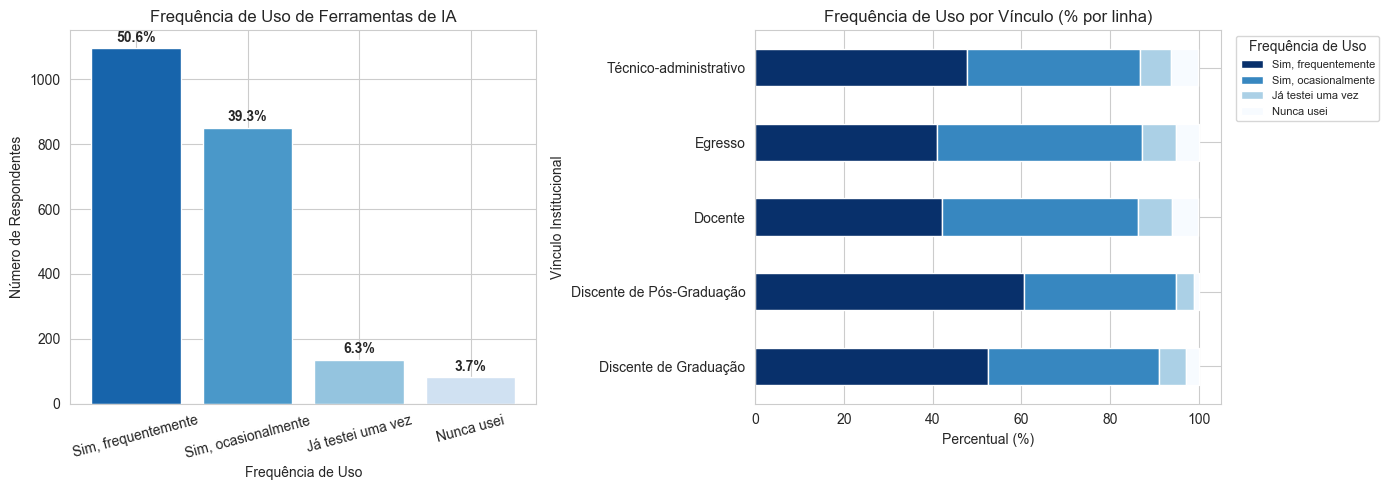


Gráfico salvo como: grafico_frequencia_uso_etapa3.png


In [10]:
# Gráficos - Frequência de Uso
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Barras gerais
cores = sns.color_palette("Blues_r", n_colors=len(freq_uso))
bars = axes[0].bar(freq_uso['Frequência de Uso'], freq_uso['Frequência'], color=cores)
axes[0].set_xlabel('Frequência de Uso')
axes[0].set_ylabel('Número de Respondentes')
axes[0].set_title('Frequência de Uso de Ferramentas de IA')
axes[0].tick_params(axis='x', rotation=15)

for bar, pct in zip(bars, freq_uso['Percentual']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                 f'{pct}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Barras empilhadas por vínculo
tab_uso_pct_plot = tab_uso_pct.drop('Total', errors='ignore')
tab_uso_pct_plot.plot(kind='barh', stacked=True, ax=axes[1], colormap='Blues_r', edgecolor='white')
axes[1].set_xlabel('Percentual (%)')
axes[1].set_ylabel('Vínculo Institucional')
axes[1].set_title('Frequência de Uso por Vínculo (% por linha)')
axes[1].legend(title='Frequência de Uso', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig('grafico_frequencia_uso_etapa3.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_frequencia_uso_etapa3.png")

In [11]:
# Teste qui-quadrado: Frequência de Uso × Vínculo
resultado_uso_vinculo = teste_qui_quadrado(df, 'Vinculo_Padronizado', 'Frequencia_Uso_IA')

print("=" * 70)
print("TESTE QUI-QUADRADO: Frequência de Uso × Vínculo")
print("=" * 70)
print(f"   Estatística χ²: {resultado_uso_vinculo['chi2']}")
print(f"   Graus de liberdade: {resultado_uso_vinculo['gl']}")
print(f"   p-valor: {resultado_uso_vinculo['p_valor']:.6f}")
print(f"   V de Cramér: {resultado_uso_vinculo['v_cramer']} ({resultado_uso_vinculo['efeito']})")
print(f"\n   📊 INTERPRETAÇÃO: {interpretar_resultado(resultado_uso_vinculo)}")

TESTE QUI-QUADRADO: Frequência de Uso × Vínculo
   Estatística χ²: 55.541
   Graus de liberdade: 12
   p-valor: 0.000000
   V de Cramér: 0.092 (desprezível)

   📊 INTERPRETAÇÃO: Há associação estatisticamente significativa (χ² = 55.541, p < 0,001) com efeito desprezível (V de Cramér = 0.092).


---

## 6. Análise do Tipo de Uso (Pago/Gratuito)

**Variável:** `Tipo_Uso`

**Categorias:** Pago | Gratuito | Ambos | Não se aplica

In [12]:
# Padronizar valores (unificar variações)
df['Tipo_Uso_Padronizado'] = df['Tipo_Uso'].replace({
    'Gratuito (versões abertas) por exemplo versões free': 'Gratuito',
    'Gratuito (versões abertas)': 'Gratuito',
    'Pago (assinaturas ou créditos)': 'Pago'
})

# Definir ordem das categorias
ordem_tipo = ['Gratuito', 'Pago', 'Ambos', 'Não se aplica']

# Calcular frequências
freq_tipo = calcular_frequencias(df, 'Tipo_Uso_Padronizado', 'Tipo de Uso')

# Reordenar
freq_tipo['ordem'] = freq_tipo['Tipo de Uso'].apply(lambda x: ordem_tipo.index(x) if x in ordem_tipo else 99)
freq_tipo = freq_tipo.sort_values('ordem').drop('ordem', axis=1).reset_index(drop=True)

print("=" * 70)
print("TIPO DE USO DE FERRAMENTAS DE IA (PAGO/GRATUITO)")
print("=" * 70)
print(freq_tipo.to_string(index=False))

TIPO DE USO DE FERRAMENTAS DE IA (PAGO/GRATUITO)
  Tipo de Uso  Frequência  Percentual  Percentual_Acum
     Gratuito        1654        76.4             76.4
         Pago         124         5.7             95.5
        Ambos         291        13.4             89.8
Não se aplica          95         4.4             99.9


In [13]:
# Estratificar por vínculo
tab_tipo_abs, tab_tipo_pct = calcular_frequencias_estratificadas(df, 'Tipo_Uso_Padronizado')

# Reordenar colunas
colunas_tipo = [c for c in ordem_tipo if c in tab_tipo_abs.columns] + ['Total']
tab_tipo_abs = tab_tipo_abs[[c for c in colunas_tipo if c in tab_tipo_abs.columns]]
tab_tipo_pct = tab_tipo_pct[[c for c in ordem_tipo if c in tab_tipo_pct.columns]]

print("\n" + "=" * 90)
print("TIPO DE USO POR VÍNCULO INSTITUCIONAL (valores absolutos)")
print("=" * 90)
print(tab_tipo_abs)

print("\n" + "=" * 90)
print("TIPO DE USO POR VÍNCULO INSTITUCIONAL (% por linha)")
print("=" * 90)
print(tab_tipo_pct)


TIPO DE USO POR VÍNCULO INSTITUCIONAL (valores absolutos)
Tipo_Uso_Padronizado       Gratuito  Pago  Ambos  Não se aplica  Total
Vinculo_Padronizado                                                   
Discente de Graduação           661    15     79             37    792
Discente de Pós-Graduação       336    41     80             11    468
Docente                         386    51     88             30    555
Egresso                          29     1      7              2     39
Técnico-administrativo          242    16     37             15    310
Total                          1654   124    291             95   2164

TIPO DE USO POR VÍNCULO INSTITUCIONAL (% por linha)
Tipo_Uso_Padronizado       Gratuito  Pago  Ambos  Não se aplica
Vinculo_Padronizado                                            
Discente de Graduação          83.5   1.9   10.0            4.7
Discente de Pós-Graduação      71.8   8.8   17.1            2.4
Docente                        69.5   9.2   15.9            5.4


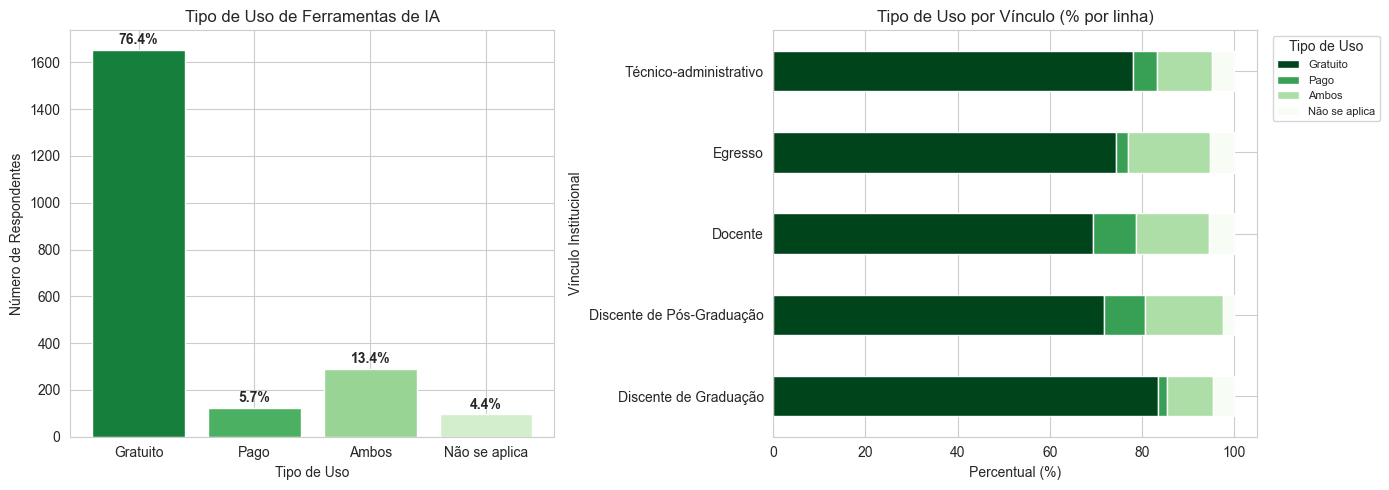


Gráfico salvo como: grafico_tipo_uso_etapa3.png


In [14]:
# Gráficos - Tipo de Uso
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Barras gerais
cores = sns.color_palette("Greens_r", n_colors=len(freq_tipo))
bars = axes[0].bar(freq_tipo['Tipo de Uso'], freq_tipo['Frequência'], color=cores)
axes[0].set_xlabel('Tipo de Uso')
axes[0].set_ylabel('Número de Respondentes')
axes[0].set_title('Tipo de Uso de Ferramentas de IA')

for bar, pct in zip(bars, freq_tipo['Percentual']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                 f'{pct}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Barras empilhadas por vínculo
tab_tipo_pct_plot = tab_tipo_pct.drop('Total', errors='ignore')
tab_tipo_pct_plot.plot(kind='barh', stacked=True, ax=axes[1], colormap='Greens_r', edgecolor='white')
axes[1].set_xlabel('Percentual (%)')
axes[1].set_ylabel('Vínculo Institucional')
axes[1].set_title('Tipo de Uso por Vínculo (% por linha)')
axes[1].legend(title='Tipo de Uso', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig('grafico_tipo_uso_etapa3.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_tipo_uso_etapa3.png")

In [15]:
# Teste qui-quadrado: Tipo de Uso × Vínculo
resultado_tipo_vinculo = teste_qui_quadrado(df, 'Vinculo_Padronizado', 'Tipo_Uso_Padronizado')

print("=" * 70)
print("TESTE QUI-QUADRADO: Tipo de Uso × Vínculo")
print("=" * 70)
print(f"   Estatística χ²: {resultado_tipo_vinculo['chi2']}")
print(f"   Graus de liberdade: {resultado_tipo_vinculo['gl']}")
print(f"   p-valor: {resultado_tipo_vinculo['p_valor']:.6f}")
print(f"   V de Cramér: {resultado_tipo_vinculo['v_cramer']} ({resultado_tipo_vinculo['efeito']})")
print(f"\n   📊 INTERPRETAÇÃO: {interpretar_resultado(resultado_tipo_vinculo)}")

TESTE QUI-QUADRADO: Tipo de Uso × Vínculo
   Estatística χ²: 71.603
   Graus de liberdade: 12
   p-valor: 0.000000
   V de Cramér: 0.105 (fraco)

   📊 INTERPRETAÇÃO: Há associação estatisticamente significativa (χ² = 71.603, p < 0,001) com efeito fraco (V de Cramér = 0.105).


---

## 7. Análise do Sentimento de Preparação

**Variável:** `Preparacao_Uso_Etico`

**Categorias:** Sim | Parcialmente | Não

In [16]:
# Definir ordem das categorias
ordem_preparacao = ['Sim', 'Parcialmente', 'Não']

# Calcular frequências
freq_prep = calcular_frequencias(df, 'Preparacao_Uso_Etico', 'Preparação')

# Reordenar
freq_prep['ordem'] = freq_prep['Preparação'].apply(lambda x: ordem_preparacao.index(x) if x in ordem_preparacao else 99)
freq_prep = freq_prep.sort_values('ordem').drop('ordem', axis=1).reset_index(drop=True)

print("=" * 70)
print("SENTIMENTO DE PREPARAÇÃO PARA USO ÉTICO DE IA")
print("=" * 70)
print(freq_prep.to_string(index=False))

SENTIMENTO DE PREPARAÇÃO PARA USO ÉTICO DE IA
  Preparação  Frequência  Percentual  Percentual_Acum
         Sim        1004        46.4             46.4
Parcialmente         918        42.4             88.8
         Não         242        11.2            100.0


In [17]:
# Estratificar por vínculo
tab_prep_abs, tab_prep_pct = calcular_frequencias_estratificadas(df, 'Preparacao_Uso_Etico')

# Reordenar colunas
colunas_prep = [c for c in ordem_preparacao if c in tab_prep_abs.columns] + ['Total']
tab_prep_abs = tab_prep_abs[[c for c in colunas_prep if c in tab_prep_abs.columns]]
tab_prep_pct = tab_prep_pct[[c for c in ordem_preparacao if c in tab_prep_pct.columns]]

print("\n" + "=" * 90)
print("PREPARAÇÃO PARA USO ÉTICO POR VÍNCULO (valores absolutos)")
print("=" * 90)
print(tab_prep_abs)

print("\n" + "=" * 90)
print("PREPARAÇÃO PARA USO ÉTICO POR VÍNCULO (% por linha)")
print("=" * 90)
print(tab_prep_pct)


PREPARAÇÃO PARA USO ÉTICO POR VÍNCULO (valores absolutos)
Preparacao_Uso_Etico        Sim  Parcialmente  Não  Total
Vinculo_Padronizado                                      
Discente de Graduação       403           314   75    792
Discente de Pós-Graduação   244           200   24    468
Docente                     218           233  104    555
Egresso                      21            14    4     39
Técnico-administrativo      118           157   35    310
Total                      1004           918  242   2164

PREPARAÇÃO PARA USO ÉTICO POR VÍNCULO (% por linha)
Preparacao_Uso_Etico        Sim  Parcialmente   Não
Vinculo_Padronizado                                
Discente de Graduação      50.9          39.6   9.5
Discente de Pós-Graduação  52.1          42.7   5.1
Docente                    39.3          42.0  18.7
Egresso                    53.8          35.9  10.3
Técnico-administrativo     38.1          50.6  11.3


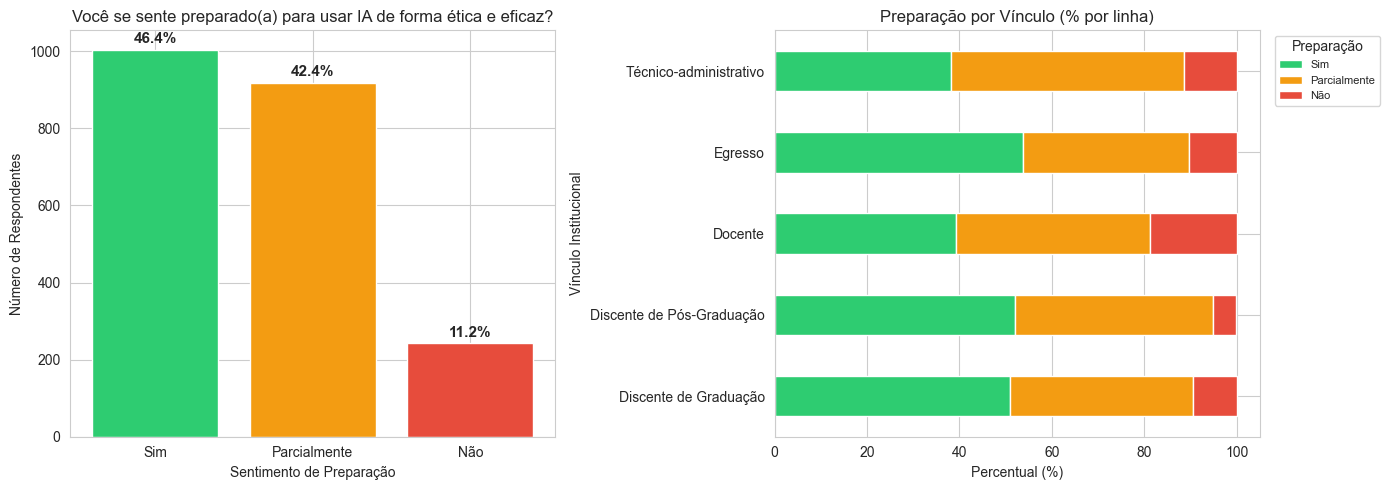


Gráfico salvo como: grafico_preparacao_etapa3.png


In [18]:
# Gráficos - Preparação
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Barras gerais
cores = ['#2ecc71', '#f39c12', '#e74c3c']  # Verde, Amarelo, Vermelho
bars = axes[0].bar(freq_prep['Preparação'], freq_prep['Frequência'], color=cores)
axes[0].set_xlabel('Sentimento de Preparação')
axes[0].set_ylabel('Número de Respondentes')
axes[0].set_title('Você se sente preparado(a) para usar IA de forma ética e eficaz?')

for bar, pct in zip(bars, freq_prep['Percentual']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                 f'{pct}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico 2: Barras empilhadas por vínculo
cores_prep = ['#2ecc71', '#f39c12', '#e74c3c']
tab_prep_pct_plot = tab_prep_pct.drop('Total', errors='ignore')
tab_prep_pct_plot.plot(kind='barh', stacked=True, ax=axes[1], color=cores_prep, edgecolor='white')
axes[1].set_xlabel('Percentual (%)')
axes[1].set_ylabel('Vínculo Institucional')
axes[1].set_title('Preparação por Vínculo (% por linha)')
axes[1].legend(title='Preparação', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig('grafico_preparacao_etapa3.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_preparacao_etapa3.png")

In [19]:
# Teste qui-quadrado: Preparação × Vínculo
resultado_prep_vinculo = teste_qui_quadrado(df, 'Vinculo_Padronizado', 'Preparacao_Uso_Etico')

print("=" * 70)
print("TESTE QUI-QUADRADO: Preparação × Vínculo")
print("=" * 70)
print(f"   Estatística χ²: {resultado_prep_vinculo['chi2']}")
print(f"   Graus de liberdade: {resultado_prep_vinculo['gl']}")
print(f"   p-valor: {resultado_prep_vinculo['p_valor']:.6f}")
print(f"   V de Cramér: {resultado_prep_vinculo['v_cramer']} ({resultado_prep_vinculo['efeito']})")
print(f"\n   📊 INTERPRETAÇÃO: {interpretar_resultado(resultado_prep_vinculo)}")

TESTE QUI-QUADRADO: Preparação × Vínculo
   Estatística χ²: 70.52
   Graus de liberdade: 8
   p-valor: 0.000000
   V de Cramér: 0.128 (fraco)

   📊 INTERPRETAÇÃO: Há associação estatisticamente significativa (χ² = 70.52, p < 0,001) com efeito fraco (V de Cramér = 0.128).


---

## 8. Análises Cruzadas Entre Variáveis

In [20]:
# Teste qui-quadrado: Frequência de Uso × Preparação
resultado_uso_prep = teste_qui_quadrado(df, 'Frequencia_Uso_IA', 'Preparacao_Uso_Etico')

print("=" * 70)
print("TESTE QUI-QUADRADO: Frequência de Uso × Preparação")
print("=" * 70)
print(f"   Estatística χ²: {resultado_uso_prep['chi2']}")
print(f"   Graus de liberdade: {resultado_uso_prep['gl']}")
print(f"   p-valor: {resultado_uso_prep['p_valor']:.6f}")
print(f"   V de Cramér: {resultado_uso_prep['v_cramer']} ({resultado_uso_prep['efeito']})")
print(f"\n   📊 INTERPRETAÇÃO: {interpretar_resultado(resultado_uso_prep)}")

TESTE QUI-QUADRADO: Frequência de Uso × Preparação
   Estatística χ²: 545.668
   Graus de liberdade: 6
   p-valor: 0.000000
   V de Cramér: 0.355 (moderado)

   📊 INTERPRETAÇÃO: Há associação estatisticamente significativa (χ² = 545.668, p < 0,001) com efeito moderado (V de Cramér = 0.355).


In [21]:
# Tabela cruzada: Frequência de Uso × Preparação
tab_uso_prep = pd.crosstab(df['Frequencia_Uso_IA'], df['Preparacao_Uso_Etico'], 
                           margins=True, margins_name='Total')

# Reordenar
tab_uso_prep = tab_uso_prep.reindex(ordem_frequencia + ['Total'])
tab_uso_prep = tab_uso_prep[ordem_preparacao + ['Total']]

print("\n" + "=" * 70)
print("TABELA CRUZADA: Frequência de Uso × Preparação")
print("=" * 70)
print(tab_uso_prep)


TABELA CRUZADA: Frequência de Uso × Preparação
Preparacao_Uso_Etico   Sim  Parcialmente  Não  Total
Frequencia_Uso_IA                                   
Sim, frequentemente    635           430   31   1096
Sim, ocasionalmente    331           427   93    851
Já testei uma vez       22            46   68    136
Nunca usei              16            15   50     81
Total                 1004           918  242   2164


In [22]:
# Teste qui-quadrado: Tipo de Uso × Preparação
resultado_tipo_prep = teste_qui_quadrado(df, 'Tipo_Uso_Padronizado', 'Preparacao_Uso_Etico')

print("=" * 70)
print("TESTE QUI-QUADRADO: Tipo de Uso × Preparação")
print("=" * 70)
print(f"   Estatística χ²: {resultado_tipo_prep['chi2']}")
print(f"   Graus de liberdade: {resultado_tipo_prep['gl']}")
print(f"   p-valor: {resultado_tipo_prep['p_valor']:.6f}")
print(f"   V de Cramér: {resultado_tipo_prep['v_cramer']} ({resultado_tipo_prep['efeito']})")
print(f"\n   📊 INTERPRETAÇÃO: {interpretar_resultado(resultado_tipo_prep)}")

TESTE QUI-QUADRADO: Tipo de Uso × Preparação
   Estatística χ²: 348.533
   Graus de liberdade: 6
   p-valor: 0.000000
   V de Cramér: 0.284 (fraco)

   📊 INTERPRETAÇÃO: Há associação estatisticamente significativa (χ² = 348.533, p < 0,001) com efeito fraco (V de Cramér = 0.284).


In [23]:
# Teste qui-quadrado: Frequência de Uso × Tipo de Uso
resultado_uso_tipo = teste_qui_quadrado(df, 'Frequencia_Uso_IA', 'Tipo_Uso_Padronizado')

print("=" * 70)
print("TESTE QUI-QUADRADO: Frequência de Uso × Tipo de Uso")
print("=" * 70)
print(f"   Estatística χ²: {resultado_uso_tipo['chi2']}")
print(f"   Graus de liberdade: {resultado_uso_tipo['gl']}")
print(f"   p-valor: {resultado_uso_tipo['p_valor']:.6f}")
print(f"   V de Cramér: {resultado_uso_tipo['v_cramer']} ({resultado_uso_tipo['efeito']})")
print(f"\n   📊 INTERPRETAÇÃO: {interpretar_resultado(resultado_uso_tipo)}")

TESTE QUI-QUADRADO: Frequência de Uso × Tipo de Uso
   Estatística χ²: 1022.694
   Graus de liberdade: 9
   p-valor: 0.000000
   V de Cramér: 0.397 (moderado)

   📊 INTERPRETAÇÃO: Há associação estatisticamente significativa (χ² = 1022.694, p < 0,001) com efeito moderado (V de Cramér = 0.397).


---

## 9. Resumo dos Testes Estatísticos

In [24]:
# Consolidar todos os resultados dos testes
resultados_testes = [
    resultado_uso_vinculo,
    resultado_tipo_vinculo,
    resultado_prep_vinculo,
    resultado_uso_prep,
    resultado_tipo_prep,
    resultado_uso_tipo
]

df_testes = pd.DataFrame(resultados_testes)
df_testes['p_valor_fmt'] = df_testes['p_valor'].apply(lambda x: '< 0,001' if x < 0.001 else f'{x:.4f}')
df_testes['resultado'] = df_testes['significativo'].apply(lambda x: '✓ Significativo' if x else '✗ Não significativo')

# Formatar para exibição
df_testes_display = df_testes[['var1', 'var2', 'chi2', 'gl', 'p_valor_fmt', 'v_cramer', 'efeito', 'resultado']]
df_testes_display.columns = ['Variável 1', 'Variável 2', 'χ²', 'gl', 'p-valor', 'V Cramér', 'Efeito', 'Resultado']

print("=" * 120)
print("RESUMO DOS TESTES QUI-QUADRADO")
print("=" * 120)
print(f"Nível de significância (α): {ALPHA}")
print("-" * 120)
print(df_testes_display.to_string(index=False))

RESUMO DOS TESTES QUI-QUADRADO
Nível de significância (α): 0.05
------------------------------------------------------------------------------------------------------------------------
          Variável 1           Variável 2       χ²  gl p-valor  V Cramér      Efeito       Resultado
 Vinculo_Padronizado    Frequencia_Uso_IA   55.541  12 < 0,001     0.092 desprezível ✓ Significativo
 Vinculo_Padronizado Tipo_Uso_Padronizado   71.603  12 < 0,001     0.105       fraco ✓ Significativo
 Vinculo_Padronizado Preparacao_Uso_Etico   70.520   8 < 0,001     0.128       fraco ✓ Significativo
   Frequencia_Uso_IA Preparacao_Uso_Etico  545.668   6 < 0,001     0.355    moderado ✓ Significativo
Tipo_Uso_Padronizado Preparacao_Uso_Etico  348.533   6 < 0,001     0.284       fraco ✓ Significativo
   Frequencia_Uso_IA Tipo_Uso_Padronizado 1022.694   9 < 0,001     0.397    moderado ✓ Significativo


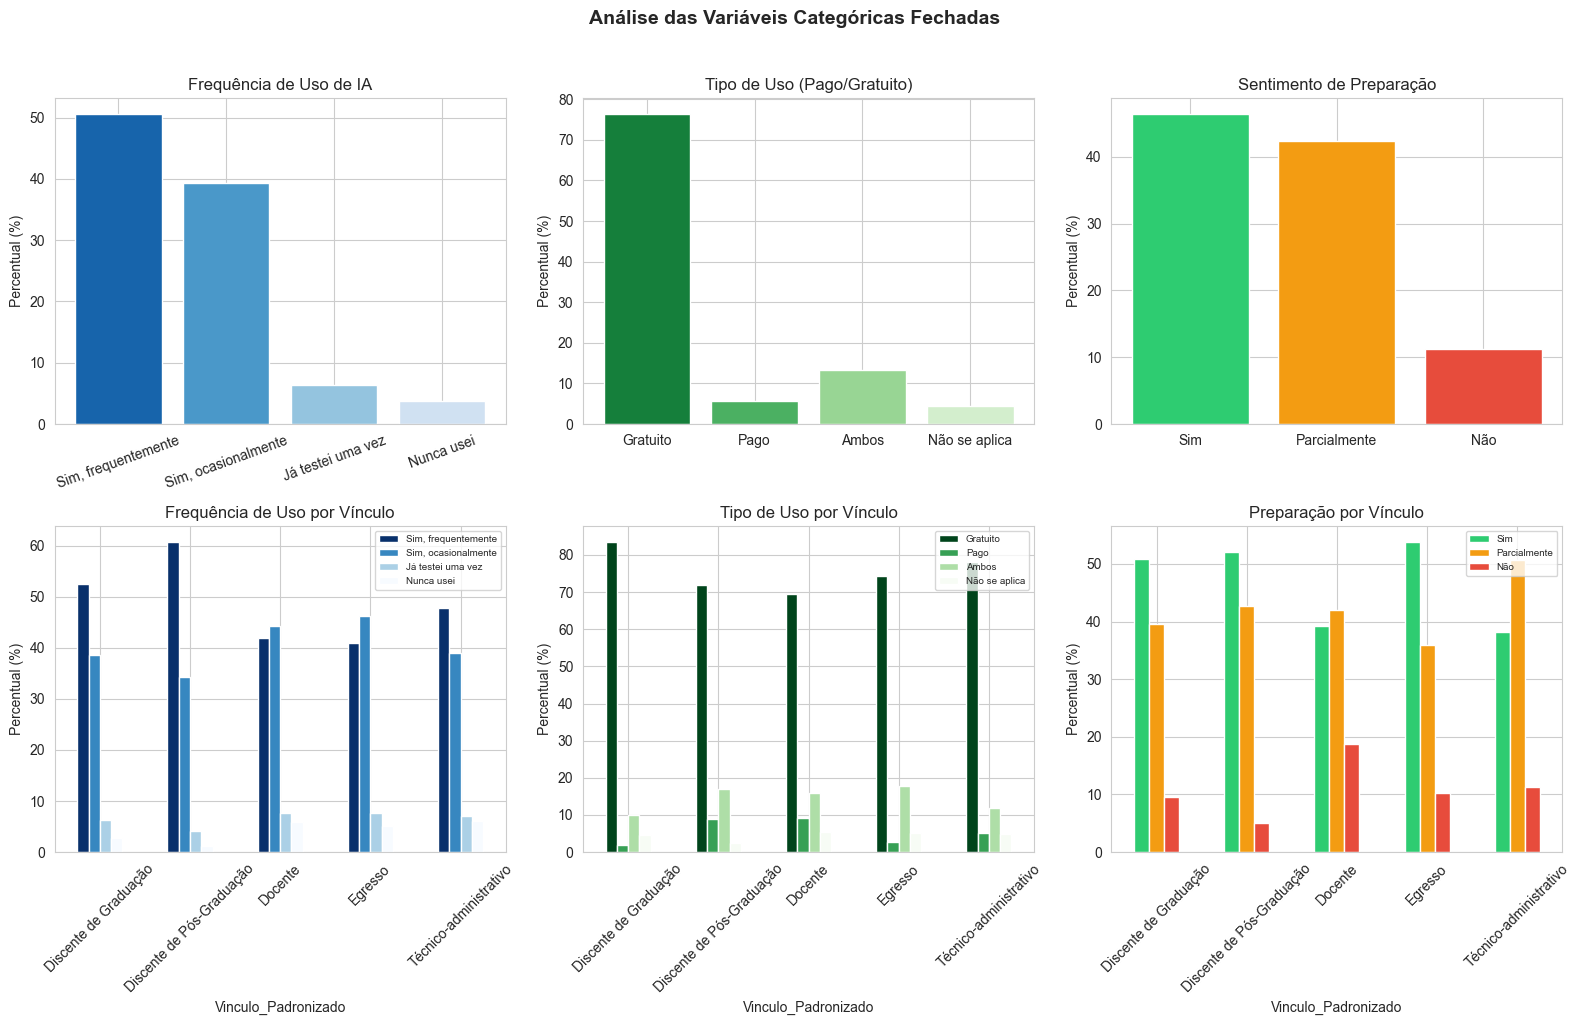


Gráfico salvo como: grafico_estratificado_etapa3.png


In [25]:
# Visualização geral: painel com todas as variáveis
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Frequência de Uso (geral)
cores_uso = sns.color_palette("Blues_r", n_colors=len(freq_uso))
axes[0, 0].bar(freq_uso['Frequência de Uso'], freq_uso['Percentual'], color=cores_uso)
axes[0, 0].set_title('Frequência de Uso de IA')
axes[0, 0].set_ylabel('Percentual (%)')
axes[0, 0].tick_params(axis='x', rotation=20)

# 2. Tipo de Uso (geral)
cores_tipo = sns.color_palette("Greens_r", n_colors=len(freq_tipo))
axes[0, 1].bar(freq_tipo['Tipo de Uso'], freq_tipo['Percentual'], color=cores_tipo)
axes[0, 1].set_title('Tipo de Uso (Pago/Gratuito)')
axes[0, 1].set_ylabel('Percentual (%)')

# 3. Preparação (geral)
cores_prep = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 2].bar(freq_prep['Preparação'], freq_prep['Percentual'], color=cores_prep)
axes[0, 2].set_title('Sentimento de Preparação')
axes[0, 2].set_ylabel('Percentual (%)')

# 4. Frequência de Uso por Vínculo
tab_uso_pct.drop('Total', errors='ignore').plot(kind='bar', ax=axes[1, 0], colormap='Blues_r', edgecolor='white')
axes[1, 0].set_title('Frequência de Uso por Vínculo')
axes[1, 0].set_ylabel('Percentual (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(fontsize=7, loc='upper right')

# 5. Tipo de Uso por Vínculo
tab_tipo_pct.drop('Total', errors='ignore').plot(kind='bar', ax=axes[1, 1], colormap='Greens_r', edgecolor='white')
axes[1, 1].set_title('Tipo de Uso por Vínculo')
axes[1, 1].set_ylabel('Percentual (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(fontsize=7, loc='upper right')

# 6. Preparação por Vínculo
tab_prep_pct.drop('Total', errors='ignore').plot(kind='bar', ax=axes[1, 2], color=cores_prep, edgecolor='white')
axes[1, 2].set_title('Preparação por Vínculo')
axes[1, 2].set_ylabel('Percentual (%)')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].legend(fontsize=7, loc='upper right')

plt.suptitle('Análise das Variáveis Categóricas Fechadas', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('grafico_estratificado_etapa3.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_estratificado_etapa3.png")

---

## 10. Resumo Executivo

In [26]:
print("=" * 70)
print("RESUMO EXECUTIVO - ETAPA 3")
print("=" * 70)

# Calcular usuários de IA
usuarios_ia = df[df['Frequencia_Uso_IA'].isin(['Sim, frequentemente', 'Sim, ocasionalmente'])]
pct_usuarios = len(usuarios_ia) / len(df) * 100

# Calcular uso gratuito
uso_gratuito = df[df['Tipo_Uso_Padronizado'] == 'Gratuito']
pct_gratuito = len(uso_gratuito) / len(df) * 100

# Calcular preparados
preparados = df[df['Preparacao_Uso_Etico'] == 'Sim']
parcialmente = df[df['Preparacao_Uso_Etico'] == 'Parcialmente']

print(f"""
📊 PRINCIPAIS ACHADOS

1. FREQUÊNCIA DE USO DE IA
   • {pct_usuarios:.1f}% dos respondentes usam IA regularmente (frequente ou ocasionalmente)
   • {freq_uso.iloc[0]['Percentual']}% usam frequentemente
   • Apenas {freq_uso[freq_uso['Frequência de Uso'] == 'Nunca usei']['Percentual'].values[0] if 'Nunca usei' in freq_uso['Frequência de Uso'].values else 0}% nunca usaram

2. TIPO DE USO (PAGO/GRATUITO)
   • {pct_gratuito:.1f}% usam predominantemente versões gratuitas
   • {freq_tipo[freq_tipo['Tipo de Uso'] == 'Pago']['Percentual'].values[0] if 'Pago' in freq_tipo['Tipo de Uso'].values else 0}% usam versões pagas
   • {freq_tipo[freq_tipo['Tipo de Uso'] == 'Ambos']['Percentual'].values[0] if 'Ambos' in freq_tipo['Tipo de Uso'].values else 0}% usam ambos

3. PREPARAÇÃO PARA USO ÉTICO
   • {len(preparados)/len(df)*100:.1f}% se sentem preparados
   • {len(parcialmente)/len(df)*100:.1f}% se sentem parcialmente preparados
   • {freq_prep[freq_prep['Preparação'] == 'Não']['Percentual'].values[0] if 'Não' in freq_prep['Preparação'].values else 0}% não se sentem preparados

📈 ASSOCIAÇÕES ESTATÍSTICAS (p < {ALPHA})
""")

for r in resultados_testes:
    status = "✓" if r['significativo'] else "✗"
    print(f"   {status} {r['var1']} × {r['var2']}: V = {r['v_cramer']} ({r['efeito']})")

RESUMO EXECUTIVO - ETAPA 3

📊 PRINCIPAIS ACHADOS

1. FREQUÊNCIA DE USO DE IA
   • 90.0% dos respondentes usam IA regularmente (frequente ou ocasionalmente)
   • 50.6% usam frequentemente
   • Apenas 3.7% nunca usaram

2. TIPO DE USO (PAGO/GRATUITO)
   • 76.4% usam predominantemente versões gratuitas
   • 5.7% usam versões pagas
   • 13.4% usam ambos

3. PREPARAÇÃO PARA USO ÉTICO
   • 46.4% se sentem preparados
   • 42.4% se sentem parcialmente preparados
   • 11.2% não se sentem preparados

📈 ASSOCIAÇÕES ESTATÍSTICAS (p < 0.05)

   ✓ Vinculo_Padronizado × Frequencia_Uso_IA: V = 0.092 (desprezível)
   ✓ Vinculo_Padronizado × Tipo_Uso_Padronizado: V = 0.105 (fraco)
   ✓ Vinculo_Padronizado × Preparacao_Uso_Etico: V = 0.128 (fraco)
   ✓ Frequencia_Uso_IA × Preparacao_Uso_Etico: V = 0.355 (moderado)
   ✓ Tipo_Uso_Padronizado × Preparacao_Uso_Etico: V = 0.284 (fraco)
   ✓ Frequencia_Uso_IA × Tipo_Uso_Padronizado: V = 0.397 (moderado)


---

## 11. Salvar Resultados

In [27]:
# Salvar todas as tabelas em um arquivo Excel com múltiplas abas
with pd.ExcelWriter(ARQUIVO_SAIDA_EXCEL, engine='openpyxl') as writer:
    # Frequências gerais
    freq_uso.to_excel(writer, sheet_name='Freq_Uso_IA', index=False)
    freq_tipo.to_excel(writer, sheet_name='Freq_Tipo_Uso', index=False)
    freq_prep.to_excel(writer, sheet_name='Freq_Preparacao', index=False)
    
    # Tabelas cruzadas absolutas
    tab_uso_abs.to_excel(writer, sheet_name='Uso_x_Vinculo_Abs')
    tab_tipo_abs.to_excel(writer, sheet_name='Tipo_x_Vinculo_Abs')
    tab_prep_abs.to_excel(writer, sheet_name='Prep_x_Vinculo_Abs')
    
    # Tabelas cruzadas percentuais
    tab_uso_pct.to_excel(writer, sheet_name='Uso_x_Vinculo_Pct')
    tab_tipo_pct.to_excel(writer, sheet_name='Tipo_x_Vinculo_Pct')
    tab_prep_pct.to_excel(writer, sheet_name='Prep_x_Vinculo_Pct')
    
    # Tabela cruzada uso × preparação
    tab_uso_prep.to_excel(writer, sheet_name='Uso_x_Preparacao')
    
    # Resultados dos testes estatísticos
    df_testes_display.to_excel(writer, sheet_name='Testes_QuiQuadrado', index=False)

print(f"✅ Tabelas salvas em: {ARQUIVO_SAIDA_EXCEL}")

✅ Tabelas salvas em: data/categoricas_fechadas_etapa3.xlsx


In [28]:
# Gerar relatório em Markdown
relatorio = f"""# RELATÓRIO DE ANÁLISE DAS VARIÁVEIS CATEGÓRICAS FECHADAS
## Etapa 3 — Consulta à Comunidade UFPE sobre o Uso de IA

**Data de execução:** {datetime.now().strftime("%d/%m/%Y às %H:%M")}

**Nível de significância (α):** {ALPHA}

---

## 1. FREQUÊNCIA DE USO DE FERRAMENTAS DE IA

| Frequência de Uso | N | % |
|-------------------|---|---|
"""

for _, row in freq_uso.iterrows():
    relatorio += f"| {row['Frequência de Uso']} | {row['Frequência']} | {row['Percentual']}% |\n"

relatorio += f"""
**Teste de associação com Vínculo Institucional:**
- χ² = {resultado_uso_vinculo['chi2']}, gl = {resultado_uso_vinculo['gl']}, p {'< 0,001' if resultado_uso_vinculo['p_valor'] < 0.001 else f"= {resultado_uso_vinculo['p_valor']:.4f}"}
- V de Cramér = {resultado_uso_vinculo['v_cramer']} (efeito {resultado_uso_vinculo['efeito']})
- **Conclusão:** {'Há' if resultado_uso_vinculo['significativo'] else 'Não há'} associação significativa entre frequência de uso e vínculo institucional.

---

## 2. TIPO DE USO (PAGO/GRATUITO)

| Tipo de Uso | N | % |
|-------------|---|---|
"""

for _, row in freq_tipo.iterrows():
    relatorio += f"| {row['Tipo de Uso']} | {row['Frequência']} | {row['Percentual']}% |\n"

relatorio += f"""
**Teste de associação com Vínculo Institucional:**
- χ² = {resultado_tipo_vinculo['chi2']}, gl = {resultado_tipo_vinculo['gl']}, p {'< 0,001' if resultado_tipo_vinculo['p_valor'] < 0.001 else f"= {resultado_tipo_vinculo['p_valor']:.4f}"}
- V de Cramér = {resultado_tipo_vinculo['v_cramer']} (efeito {resultado_tipo_vinculo['efeito']})
- **Conclusão:** {'Há' if resultado_tipo_vinculo['significativo'] else 'Não há'} associação significativa entre tipo de uso e vínculo institucional.

---

## 3. SENTIMENTO DE PREPARAÇÃO PARA USO ÉTICO

| Preparação | N | % |
|------------|---|---|
"""

for _, row in freq_prep.iterrows():
    relatorio += f"| {row['Preparação']} | {row['Frequência']} | {row['Percentual']}% |\n"

relatorio += f"""
**Teste de associação com Vínculo Institucional:**
- χ² = {resultado_prep_vinculo['chi2']}, gl = {resultado_prep_vinculo['gl']}, p {'< 0,001' if resultado_prep_vinculo['p_valor'] < 0.001 else f"= {resultado_prep_vinculo['p_valor']:.4f}"}
- V de Cramér = {resultado_prep_vinculo['v_cramer']} (efeito {resultado_prep_vinculo['efeito']})
- **Conclusão:** {'Há' if resultado_prep_vinculo['significativo'] else 'Não há'} associação significativa entre preparação e vínculo institucional.

---

## 4. RESUMO DOS TESTES DE ASSOCIAÇÃO

| Variável 1 | Variável 2 | χ² | gl | p-valor | V Cramér | Efeito | Resultado |
|------------|------------|----|----|---------|----------|--------|----------|
"""

for _, row in df_testes_display.iterrows():
    relatorio += f"| {row['Variável 1']} | {row['Variável 2']} | {row['χ²']} | {row['gl']} | {row['p-valor']} | {row['V Cramér']} | {row['Efeito']} | {row['Resultado']} |\n"

relatorio += f"""
---

## 5. PRINCIPAIS CONCLUSÕES

1. **Alta adoção de IA:** {pct_usuarios:.1f}% dos respondentes utilizam ferramentas de IA regularmente.

2. **Predominância do uso gratuito:** {pct_gratuito:.1f}% utilizam versões gratuitas.

3. **Necessidade de capacitação:** {len(parcialmente)/len(df)*100:.1f}% se sentem apenas parcialmente preparados para o uso ético.

4. **Diferenças por vínculo:** As análises indicam {'associações significativas' if any(r['significativo'] for r in resultados_testes[:3]) else 'poucas diferenças significativas'} entre os grupos de vínculo institucional.

---

## 6. ARQUIVOS GERADOS

| Arquivo | Descrição |
|---------|----------|
| `{ARQUIVO_SAIDA_EXCEL}` | Tabelas de frequência e testes estatísticos |
| `grafico_frequencia_uso_etapa3.png` | Distribuição da frequência de uso |
| `grafico_tipo_uso_etapa3.png` | Distribuição do tipo de uso |
| `grafico_preparacao_etapa3.png` | Distribuição da preparação |
| `grafico_estratificado_etapa3.png` | Painel com análises estratificadas |

---

*Relatório gerado automaticamente em {datetime.now().strftime("%d/%m/%Y às %H:%M")}*
"""

# Salvar relatório
with open(ARQUIVO_SAIDA_RELATORIO, "w", encoding='utf-8') as f:
    f.write(relatorio)

print(f"✅ Relatório salvo em: {ARQUIVO_SAIDA_RELATORIO}")

✅ Relatório salvo em: data/relatorio_categoricas_etapa3.md


In [29]:
print("\n" + "=" * 70)
print("ETAPA 3 CONCLUÍDA COM SUCESSO!")
print("=" * 70)
print(f"""
📁 ARQUIVOS GERADOS:

   📊 Dados:
      • {ARQUIVO_SAIDA_EXCEL}

   📈 Gráficos:
      • grafico_frequencia_uso_etapa3.png
      • grafico_tipo_uso_etapa3.png
      • grafico_preparacao_etapa3.png
      • grafico_estratificado_etapa3.png

   📝 Relatório:
      • {ARQUIVO_SAIDA_RELATORIO}

▶️  PRÓXIMA ETAPA: Etapa 4 - Análise das Variáveis de Escala Likert
""")


ETAPA 3 CONCLUÍDA COM SUCESSO!

📁 ARQUIVOS GERADOS:

   📊 Dados:
      • data/categoricas_fechadas_etapa3.xlsx

   📈 Gráficos:
      • grafico_frequencia_uso_etapa3.png
      • grafico_tipo_uso_etapa3.png
      • grafico_preparacao_etapa3.png
      • grafico_estratificado_etapa3.png

   📝 Relatório:
      • data/relatorio_categoricas_etapa3.md

▶️  PRÓXIMA ETAPA: Etapa 4 - Análise das Variáveis de Escala Likert



---

## Resumo dos Arquivos

### Entrada
| Arquivo | Origem |
|---------|--------|
| `dados_limpos_etapa1.xlsx` | Etapa 1 |

### Saída
| Arquivo | Descrição |
|---------|----------|
| `categoricas_fechadas_etapa3.xlsx` | Tabelas de frequência e testes estatísticos (11 abas) |
| `grafico_frequencia_uso_etapa3.png` | Distribuição da frequência de uso de IA |
| `grafico_tipo_uso_etapa3.png` | Distribuição do tipo de uso (pago/gratuito) |
| `grafico_preparacao_etapa3.png` | Distribuição do sentimento de preparação |
| `grafico_estratificado_etapa3.png` | Painel consolidado com todas as análises |
| `relatorio_categoricas_etapa3.md` | Relatório descritivo com testes estatísticos |

---

**Próxima etapa:** Etapa 4 - Análise das Variáveis de Escala Likert